In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv(r'C:\Users\princ\OneDrive\2025\Machine Learning\data\loan_sanction_train.csv')

In [4]:
dataset.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


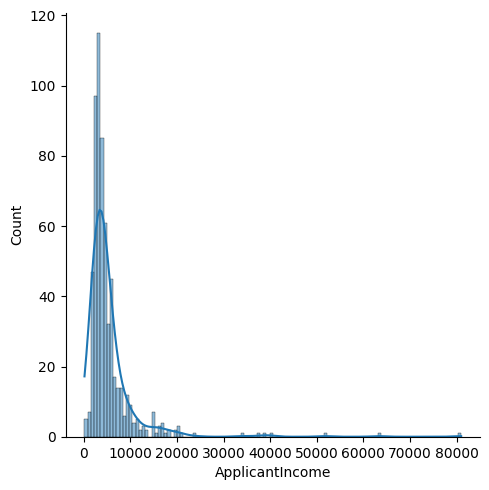

In [7]:
sns.displot(dataset["ApplicantIncome"], kde = True)
plt.show()

In [8]:
dataset["ApplicantIncome"].shape

(614,)

In [9]:
q1 = dataset["ApplicantIncome"].quantile(0.25)
q1

np.float64(2877.5)

In [10]:
q3 = dataset["ApplicantIncome"].quantile(0.75)
q3 

np.float64(5795.0)

In [11]:
IQR = q3 - q1 
IQR

np.float64(2917.5)

In [12]:
min_range = q1 - (1.5*IQR)
min_range

np.float64(-1498.75)

In [13]:
max_range = q3 + (1.5*IQR)
max_range

np.float64(10171.25)

In [14]:
dataset["ApplicantIncome_out"] = dataset["ApplicantIncome"]<= max_range

In [15]:
dataset["ApplicantIncome_out"].shape

(614,)

In [16]:
# Future Scaling
from sklearn.preprocessing import StandardScaler

In [17]:
SS = StandardScaler()

In [18]:
SS.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [19]:
dataset["ApplicantIncome_StdScaler"] = pd.DataFrame(SS.transform(dataset[["ApplicantIncome"]]))

In [20]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_out,ApplicantIncome_StdScaler
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,True,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,True,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True,-0.393747


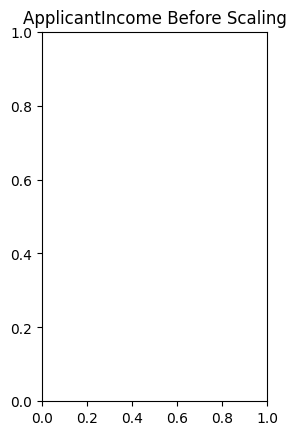

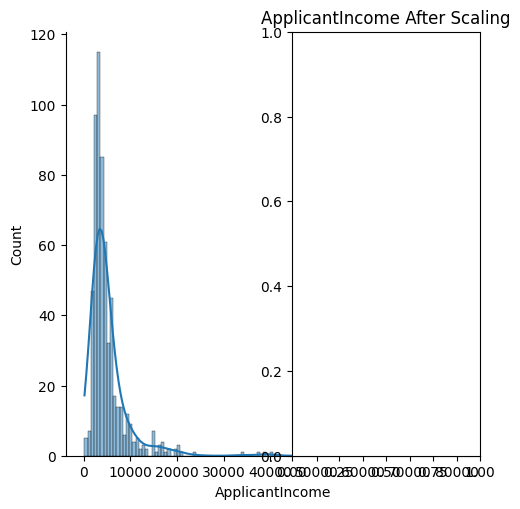

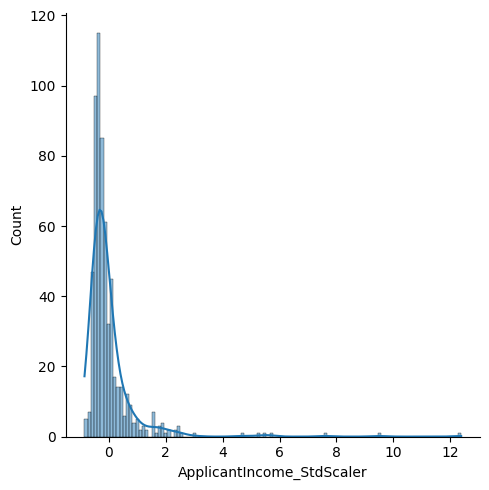

In [21]:
plt.subplot(1, 2, 1)
plt.title("ApplicantIncome Before Scaling")
sns.displot(dataset["ApplicantIncome"], kde = True)

plt.subplot(1, 2, 2)
plt.title("ApplicantIncome After Scaling")
sns.displot(dataset ["ApplicantIncome_StdScaler"], kde = True)

plt.show()



In [22]:
dataset.isnull().sum()

Loan_ID                       0
Gender                       13
Married                       3
Dependents                   15
Education                     0
Self_Employed                32
ApplicantIncome               0
CoapplicantIncome             0
LoanAmount                   22
Loan_Amount_Term             14
Credit_History               50
Property_Area                 0
Loan_Status                   0
ApplicantIncome_out           0
ApplicantIncome_StdScaler     0
dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
MM = MinMaxScaler()

In [25]:
MM.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [28]:
dataset["CoapplicantIncome_MinMaxScaler"] = pd.DataFrame(MM.transform(dataset[["CoapplicantIncome"]]))  

In [29]:
dataset.head(3) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_out,ApplicantIncome_StdScaler,CoapplicantIncome_MinMaxScaler
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y,True,0.072991,0.000000e+00
1,LP001003,Male,Yes,1,Graduate,No,4583,0.036192,128.0,360.0,1.0,Rural,N,True,-0.134412,8.685941e-07
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y,True,-0.393747,0.000000e+00


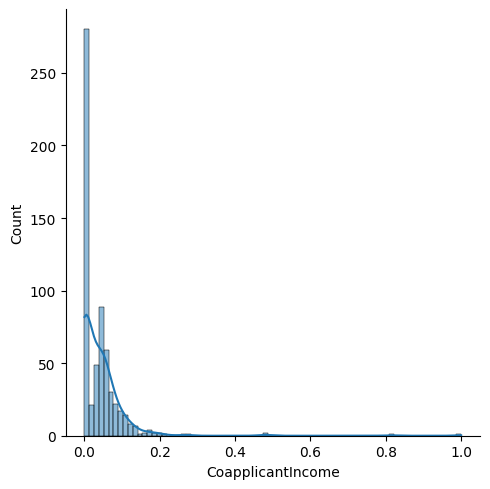

In [30]:
sns.displot(dataset["CoapplicantIncome"], kde = True)
plt.show()  